In [357]:
setwd('/import/DB/fel/BJTC-204')

In [358]:
crg = read.table('./00_rawdata/crg.txt',header =T,sep = '\t')

In [359]:
head(crg,1)

,MGI.Gene.Marker.ID,Symbol,Name,Chr,Qualifier,Annotated.Term,Context,Proteoform,Evidence,Inferred.From,Reference.s.
,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,MGI:1919440,2510009E07Rik,RIKEN cDNA 2510009E07 gene,16,NA,circadian behavior,,,ISS,Q1LY84,J:342587


In [360]:
library(homologene)

In [361]:
genelist = crg$Symbol
homo = homologene(genelist, inTax = 10090, outTax = 9606)

In [362]:
head(homo,2)

,10090,9606,10090_ID,9606_ID
,<chr>,<chr>,<int>,<int>
1,2510009E07Rik,C3orf70,72190,285382
2,Aanat,AANAT,11298,15


In [370]:
diff  =read.table('./01_DEG/DEG_all.txt',header =T,sep = '\t',row.names = 1) 

In [371]:
head(diff,3)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,change
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
XIST,-3.975348,6.102979,-98.35750,2.39e-146,2.83e-142,270.8721,DOWN
RPS4Y1,3.247028,8.509335,51.71534,1.32e-102,7.82e-99,206.4872,UP
KDM5D,1.744797,7.819317,29.88410,8.44e-68,3.33e-64,138.7601,UP


In [410]:
table(diff$change)


DOWN  NOT   UP 
1645 8665 1535 

In [411]:
library(dplyr)

In [412]:
data <- 
  diff %>% 
  mutate(change = as.factor(ifelse(adj.P.Val < 0.01 & abs(logFC) > 0,
                                   ifelse(logFC > 0 ,'Up','Down'),'NOT'))) %>% 
  tibble::rownames_to_column('gene')

In [413]:
table(data$change)


 Down   NOT    Up 
  515 10646   684 

In [414]:
head(data,3)

,gene,logFC,AveExpr,t,P.Value,adj.P.Val,B,change
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,XIST,-3.975348,6.102979,-98.35750,2.39e-146,2.83e-142,270.8721,Down
2,RPS4Y1,3.247028,8.509335,51.71534,1.32e-102,7.82e-99,206.4872,Up
3,KDM5D,1.744797,7.819317,29.88410,8.44e-68,3.33e-64,138.7601,Up


In [415]:
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(cowplot)

Warning message:
"Removed 13 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 13 rows containing missing values (`geom_point()`)."


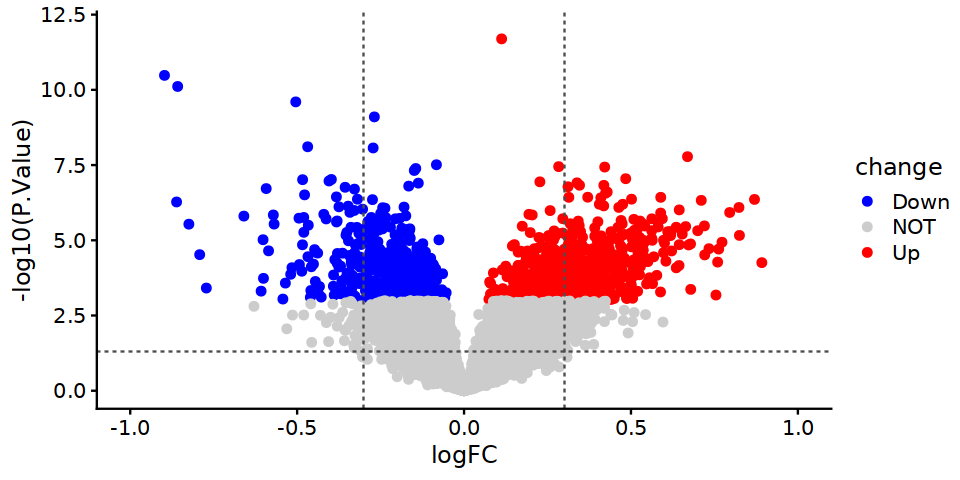

In [416]:
top_5 <- bind_rows(   
      data %>%
        filter(change == 'Up') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      data %>%
        filter(change == 'Down') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )
    ggplot(data=data,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=change),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(-0.3,0.3),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("blue","grey80","red"))+
    theme_half_open() +ylim(0,12)+xlim(-1,1)
    ggsave('Volcano.pdf',height = 8,width = 8)

In [417]:
diff1 = data %>%  dplyr::filter(change != 'NOT')

In [418]:
dim(diff1)

[1] 1199    8

In [419]:
tail(diff1,2)

,gene,logFC,AveExpr,t,P.Value,adj.P.Val,B,change
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1198,STYK1,0.1471234,4.851660,3.349142,0.001008361,0.009969981,-1.272202,Up
1199,FBLN1,-0.1200976,5.977683,-3.348187,0.001011614,0.009993805,-1.275157,Down


In [420]:
sample_list <- list(DEGs = diff1$gene, CRGs = homo[,2])

In [421]:
library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

In [422]:
q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', 2), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

png 
  2

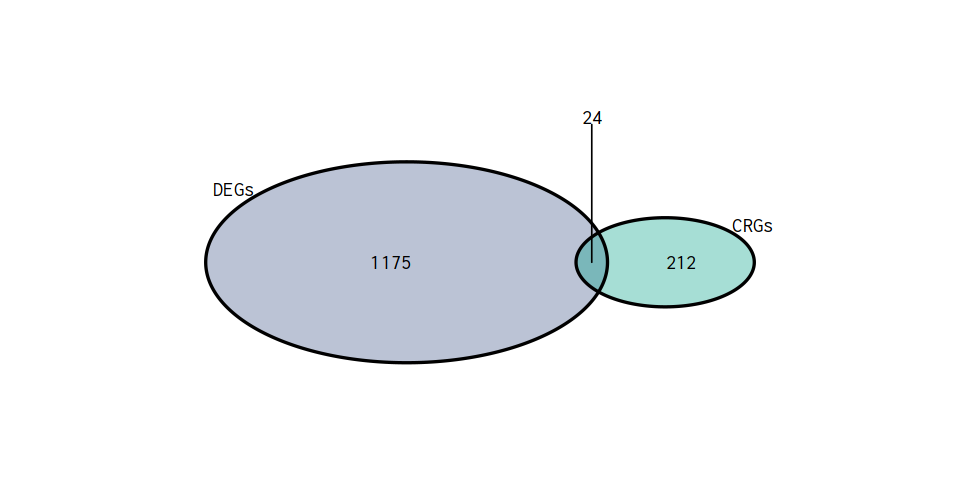

In [423]:
grid.draw(q)

In [424]:
jiaoji = intersect(diff1$gene,homo[,2])

In [425]:
exp<- read.table("./00_rawdata/exp.txt",sep = '\t',header = T,row.names = 1) 

In [426]:
data1 = exp[jiaoji,]

In [427]:
dim(data1)

[1]  24 161

In [428]:
head(data1,2)

,GSM1124358,GSM1124359,GSM1124360,GSM1124361,GSM1124362,GSM1124363,GSM1124364,GSM1124365,GSM1124366,GSM1124367,...,GSM1124509,GSM1124510,GSM1124511,GSM1124512,GSM1124513,GSM1124514,GSM1124515,GSM1124516,GSM1124517,GSM1124518
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCB1,6.437848,6.496942,6.206184,5.957033,6.023741,6.858445,6.370457,6.542385,7.160112,7.416374,...,5.776037,5.828036,5.936017,6.031469,6.443455,5.762561,5.951787,6.337773,5.846614,6.738088
DBP,7.069300,7.508241,7.277594,7.027526,7.699184,6.811971,7.624010,7.075506,7.137115,6.452592,...,7.330012,7.188833,7.021530,6.825326,6.921645,7.087072,7.101135,6.719110,7.272136,6.703919


In [429]:
gene <- t(data1)

In [430]:
gene <- log(gene+1)

In [431]:
gene_cor <- cor(gene, method = 'pearson')

In [432]:
diag(gene_cor) <- 0

In [433]:
gene_cor <- reshape2::melt(gene_cor)
gene_cor <- subset(gene_cor, value != 0)  #去除0值的相关性
head(gene_cor)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
2,DBP,ABCB1,-0.4027474
3,ADCY1,ABCB1,-0.5279064
4,MAPK9,ABCB1,-0.4770417
5,ID3,ABCB1,0.5368309
6,CASP1,ABCB1,0.2057396
7,FAS,ABCB1,0.5250471


In [434]:
# library(circlize)
# pdf('cor.circle.pdf',height = 6,width = 6)
# p=chordDiagram(gene_cor, 
#     annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
#     grid.col = c(GABRD = 'green3', PLVAP = 'red', CDKN3 = 'orange', CDC25C = 'purple', UBE2T = 'skyblue', SKA1 = 'blue'), #定义基因颜色
#     col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
#     annotationTrackHeight = c(0.05, 0.05), #名称离圆弧的距离，以及圆弧的宽度
# )
# dev.off()

In [435]:
# chordDiagram(gene_cor, 
#     annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
#     grid.col = c(GABRD = 'green3', PLVAP = 'red', CDKN3 = 'orange', CDC25C = 'purple', UBE2T = 'skyblue', SKA1 = 'blue'), #定义基因颜色
#     col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
#     annotationTrackHeight = c(0.05, 0.05), )#名称离圆弧的距离，以及圆弧的宽度

In [436]:
head(data1,2)

,GSM1124358,GSM1124359,GSM1124360,GSM1124361,GSM1124362,GSM1124363,GSM1124364,GSM1124365,GSM1124366,GSM1124367,...,GSM1124509,GSM1124510,GSM1124511,GSM1124512,GSM1124513,GSM1124514,GSM1124515,GSM1124516,GSM1124517,GSM1124518
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCB1,6.437848,6.496942,6.206184,5.957033,6.023741,6.858445,6.370457,6.542385,7.160112,7.416374,...,5.776037,5.828036,5.936017,6.031469,6.443455,5.762561,5.951787,6.337773,5.846614,6.738088
DBP,7.069300,7.508241,7.277594,7.027526,7.699184,6.811971,7.624010,7.075506,7.137115,6.452592,...,7.330012,7.188833,7.021530,6.825326,6.921645,7.087072,7.101135,6.719110,7.272136,6.703919


In [437]:
library(pheatmap)

In [438]:
da=log2(data1+1)
dat=t(scale(t(da))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)

[1]  24 161

In [439]:
options(repr.plot.width = 8,repr.plot.height = 4)

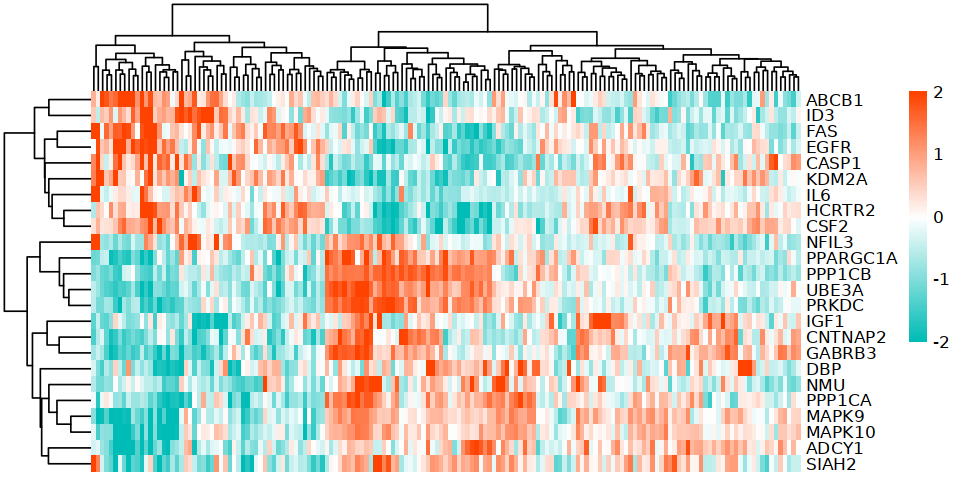

In [440]:
xx = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=TRUE,
         show_colnames = FALSE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100),#换颜色
          angle_col = 45 #修改横轴坐标名倾斜度
)

In [441]:
save_pheatmap_pdf <- function(x, filename, width=8, height=6) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_pdf(xx, "heatmap.pdf")

png 
  2

In [442]:
library(readxl)

In [443]:
group = read_excel("./00_rawdata/DLPFC_group.xlsx")

In [444]:
head(group,2)

Symbol,Group
<chr>,<chr>
GSM1124358,control
GSM1124359,MDD


In [445]:
expr = gene %>% as.data.frame() %>% 
tibble::rownames_to_column(.,'sample')

In [446]:
expr1 = merge(group,expr,by.x = 'Symbol',by.y = 'sample')

In [447]:
head(expr1,2)

,Symbol,Group,ABCB1,DBP,ADCY1,MAPK9,ID3,CASP1,FAS,UBE3A,...,CSF2,PRKDC,IL6,EGFR,MAPK10,PPARGC1A,NMU,NFIL3,SIAH2,PPP1CB
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GSM1124358,control,2.006582,2.088067,2.209855,2.125476,2.105605,1.826383,1.871490,2.016419,...,1.89301,1.980718,2.294302,2.070409,2.344453,1.932350,1.722470,2.361215,2.118150,2.122166
2,GSM1124359,MDD,2.014495,2.141035,2.248393,2.256796,2.113936,1.775478,1.777546,2.046408,...,1.87103,2.013405,1.772629,2.029070,2.383743,1.996535,1.995799,1.941229,2.071485,2.150242


In [448]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

In [451]:
mydata<-expr1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",ABCB1:PPP1CB) %>% 
  ##
  dplyr::select(Group,gene,Expression) 

In [452]:
head(mydata,2)

,Group,gene,Expression
,<chr>,<chr>,<dbl>
1,control,ABCB1,2.006582
2,MDD,ABCB1,2.014495


In [453]:
compare_means( Expression ~ Group, data = mydata, 
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "Group", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ABCB1,Expression,control,MDD,5.359440e-08,1.2e-06,5.4e-08,****,Wilcoxon
DBP,Expression,control,MDD,1.802146e-08,4.3e-07,1.8e-08,****,Wilcoxon
ADCY1,Expression,control,MDD,1.459369e-05,3.1e-04,1.5e-05,****,Wilcoxon
MAPK9,Expression,control,MDD,2.281536e-05,4.6e-04,2.3e-05,****,Wilcoxon
ID3,Expression,control,MDD,5.420368e-05,9.8e-04,5.4e-05,****,Wilcoxon
CASP1,Expression,control,MDD,2.354846e-04,2.1e-03,0.00024,***,Wilcoxon
FAS,Expression,control,MDD,1.012002e-04,1.2e-03,0.00010,***,Wilcoxon
UBE3A,Expression,control,MDD,6.585270e-06,1.4e-04,6.6e-06,****,Wilcoxon
IGF1,Expression,control,MDD,7.249856e-05,1.0e-03,7.2e-05,****,Wilcoxon


In [460]:
options(repr.plot.height = 5,repr.plot.width = 25)

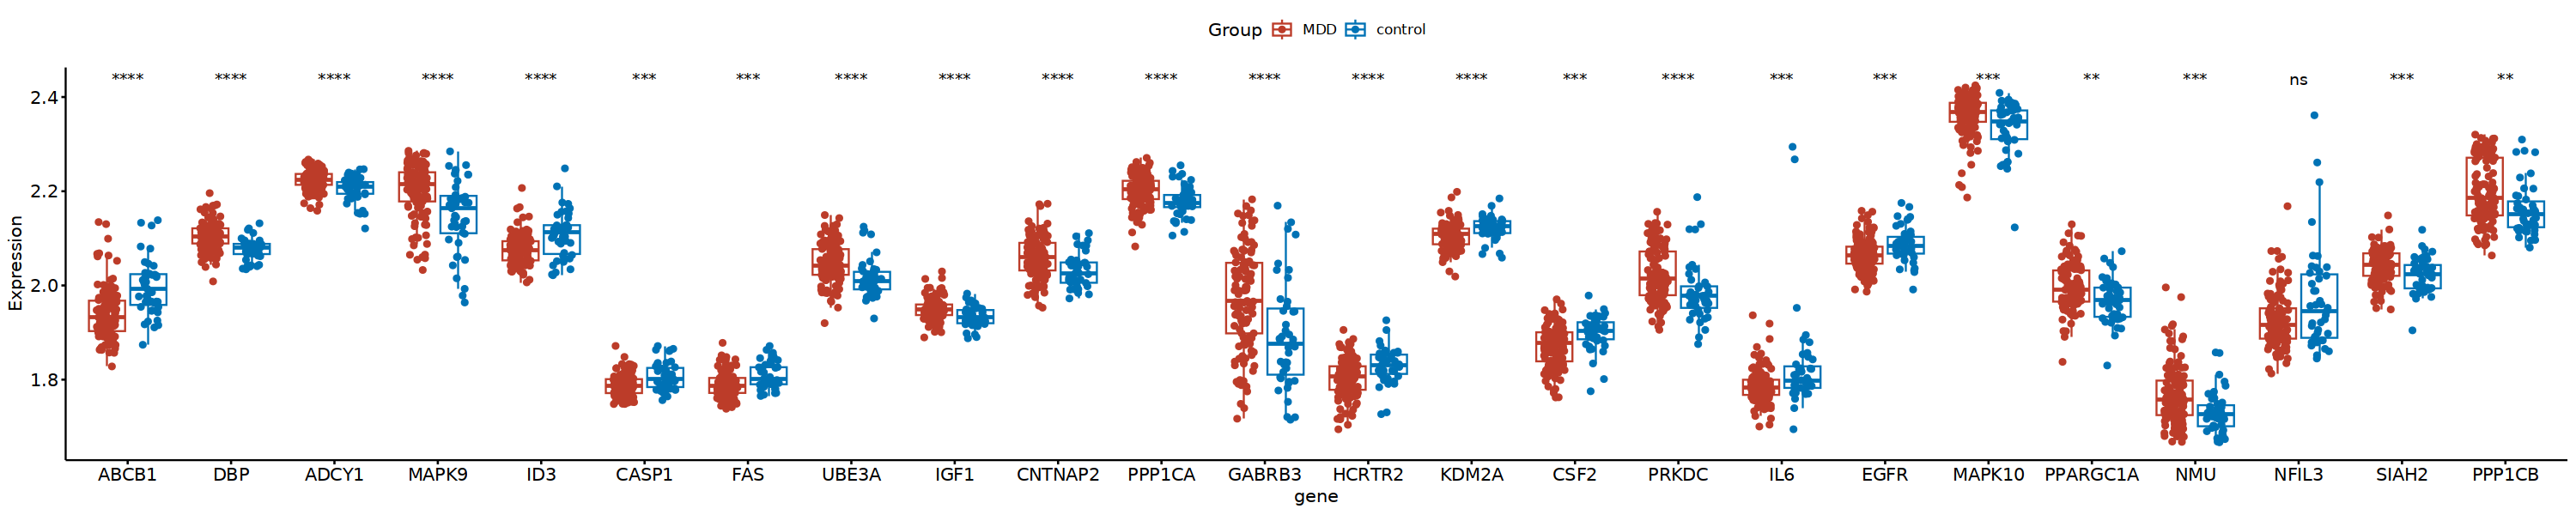

In [461]:
p + stat_compare_means(aes(group = Group), label = "p.signif")

In [462]:
ggsave('boxplot.pdf',height = 5,width = 22)

In [463]:
 library(clusterProfiler)
library(org.Hs.eg.db)

In [464]:
 gene_symbol <- bitr(geneID = jiaoji,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns



In [465]:
head(BP,2)

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0007623,BP,GO:0007623,circadian rhythm,15/24,210/18903,3.498184e-24,4.984912e-21,3.001073e-21,DBP/ADCY1/MAPK9/ID3/UBE3A/PPP1CA/HCRTR2/KDM2A/CSF2/PRKDC/MAPK10/PPARGC1A/NFIL3/SIAH2/PPP1CB,15
GO:0048511,BP,GO:0048511,rhythmic process,15/24,302/18903,9.150574e-22,6.519784e-19,3.925114e-19,DBP/ADCY1/MAPK9/ID3/UBE3A/PPP1CA/HCRTR2/KDM2A/CSF2/PRKDC/MAPK10/PPARGC1A/NFIL3/SIAH2/PPP1CB,15


In [466]:
 BP %>% filter(ONTOLOGY	 == 'BP') %>% head(10) -> bp
 BP %>% filter(ONTOLOGY	 == 'MF') %>% head(10) -> mf
 BP %>% filter(ONTOLOGY	 == 'CC') %>% head(10) -> cc

In [467]:
go = rbind(bp,mf,cc)

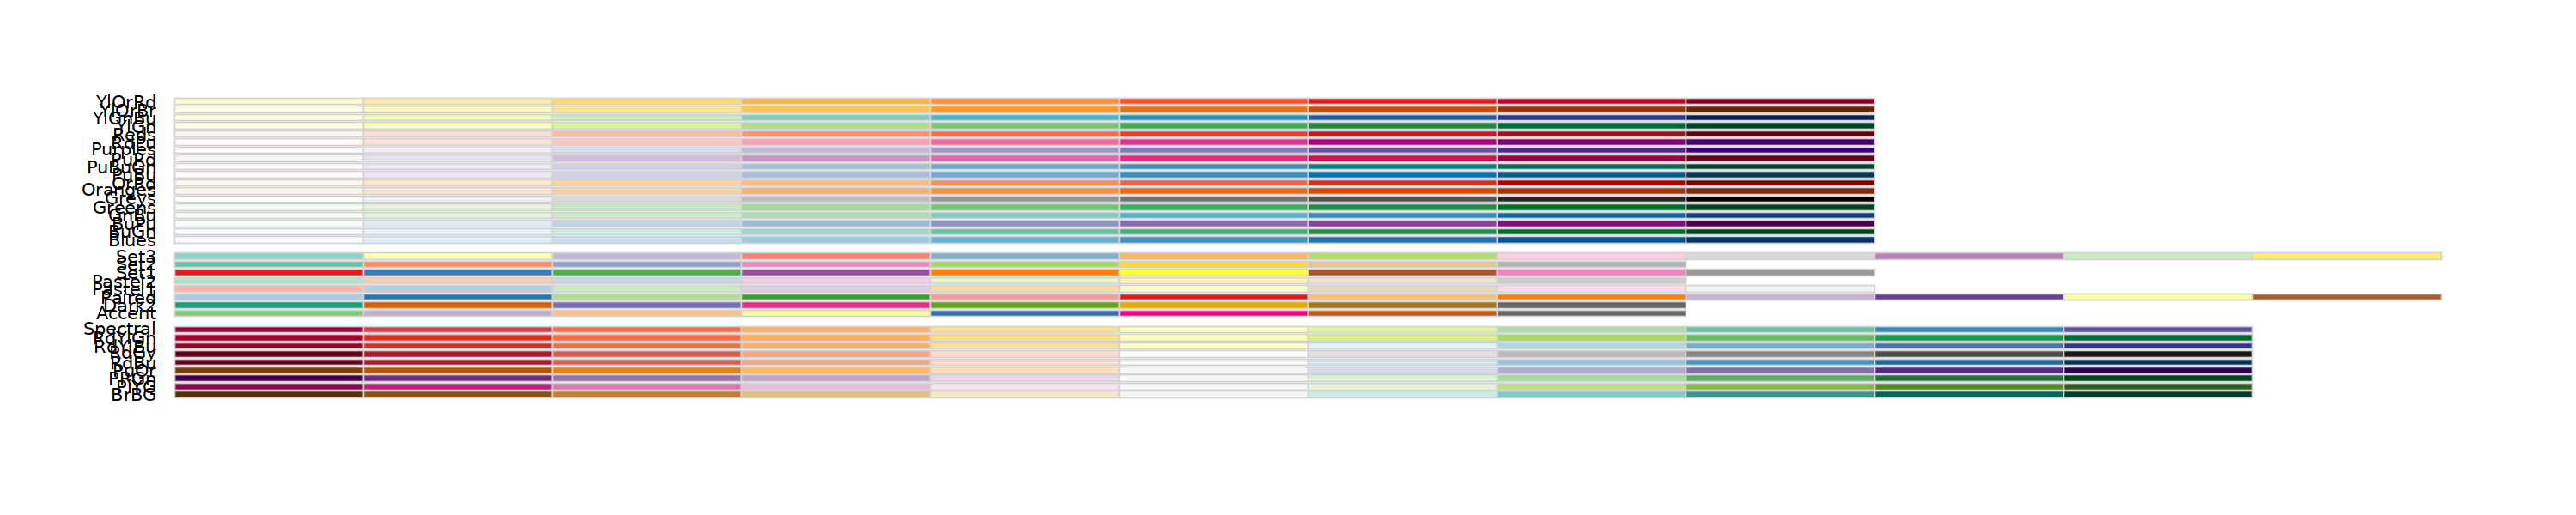

In [468]:
library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=10)

In [469]:
options(repr.plot.height = 8)

In [470]:
go$Description<- factor(go$Description,levels=go$Description)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


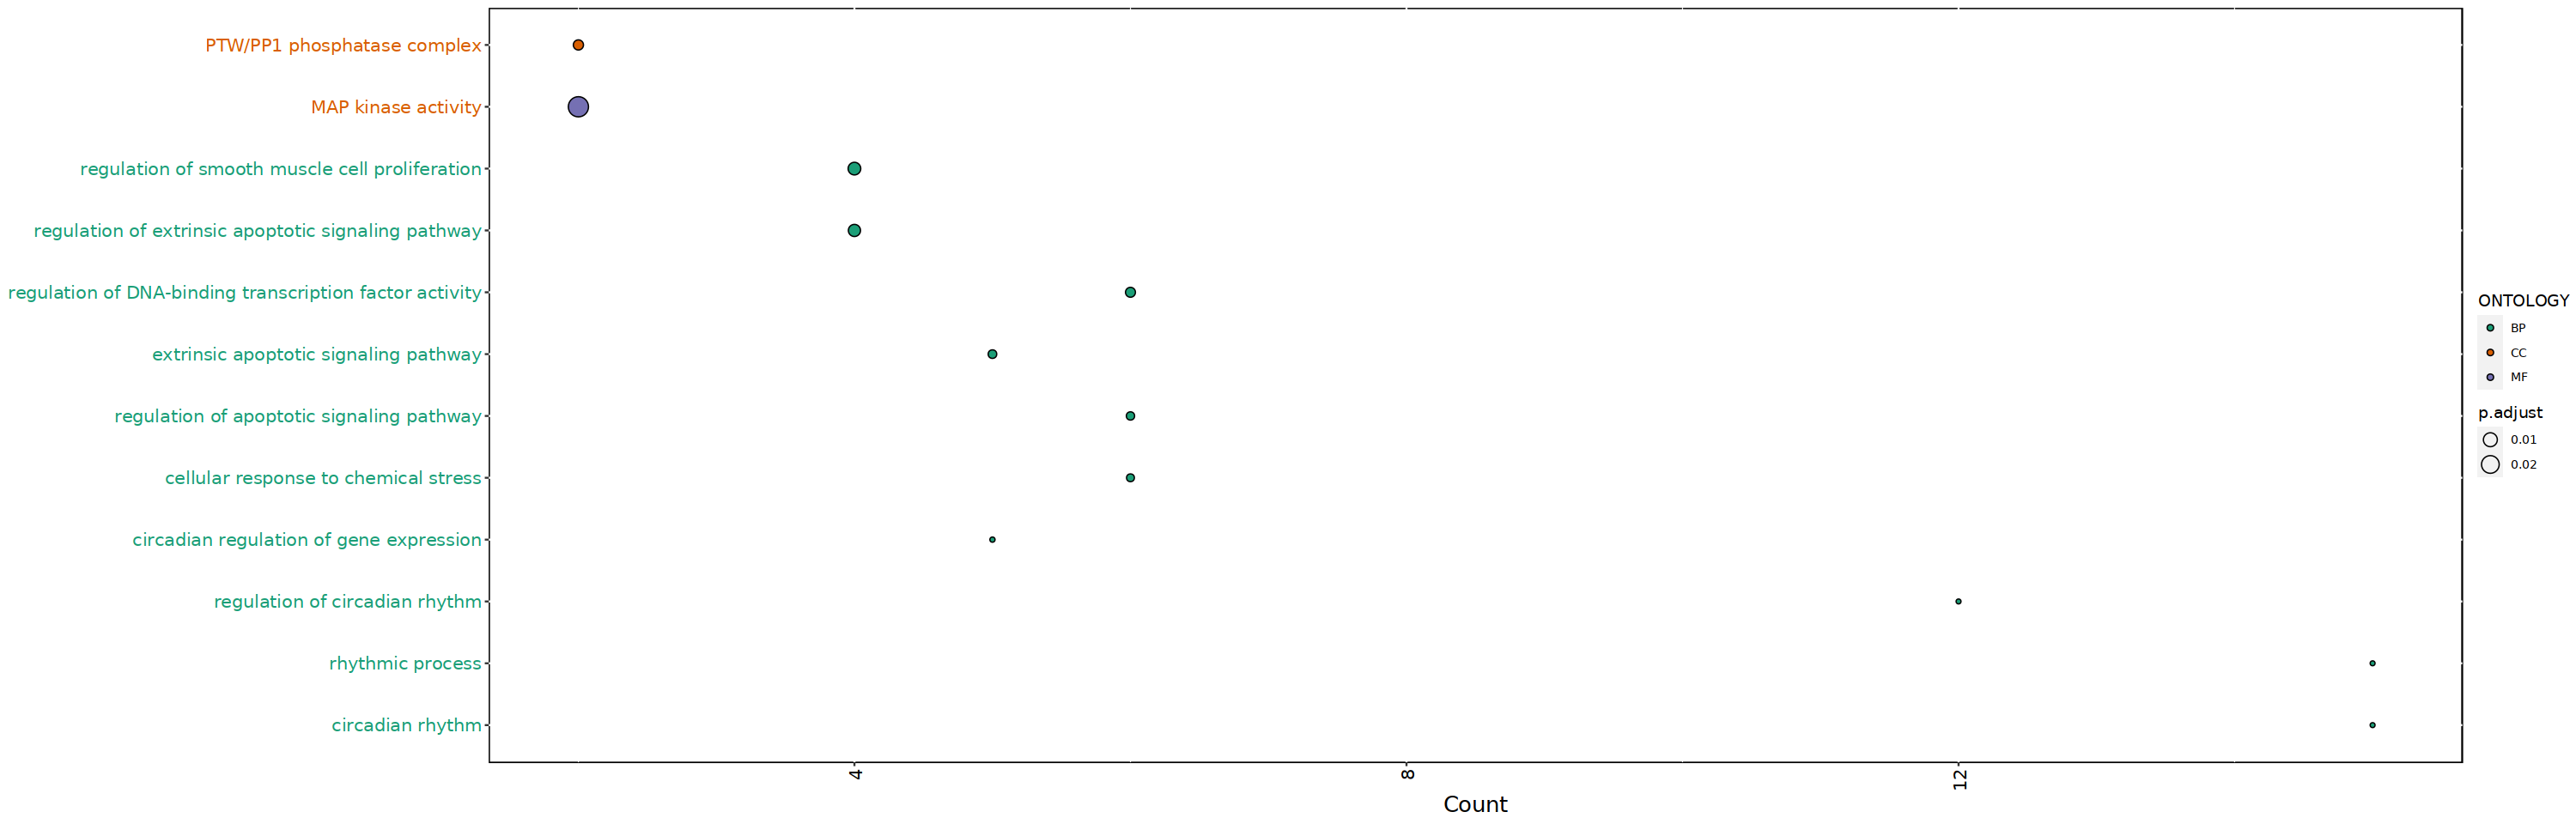

In [471]:
ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY,size=p.adjust) +
  geom_point(shape=21,color="black") +
  #scale_fill_hue() +
  xlab("Counts")+
  scale_fill_manual(values =color)+
  coord_flip()+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 90,hjust=1,vjust=0.6),
    axis.title.y = element_blank(),
    axis.text.y = element_text(colour = colorl),
    #legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    #legend.direction = "horizontal",
    #legend.position = c(0.5,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    plot.background = element_blank()
  )

In [472]:
pdf('go.pdf',height = 8,width = 6)

In [473]:
library(enrichplot)

Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
"Use 'cex.params = list(category_label = your_value)' instead of 'cex_label_category'.
 The cex_label_category parameter will be removed in the next version."
Warning message in emapplot.enrichResult(x, showCategory = showCategory, ...):
"Use 'cex.params = list(line = your_value)' instead of 'cex_line'.
 The cex_line parameter will be removed in the next version."
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


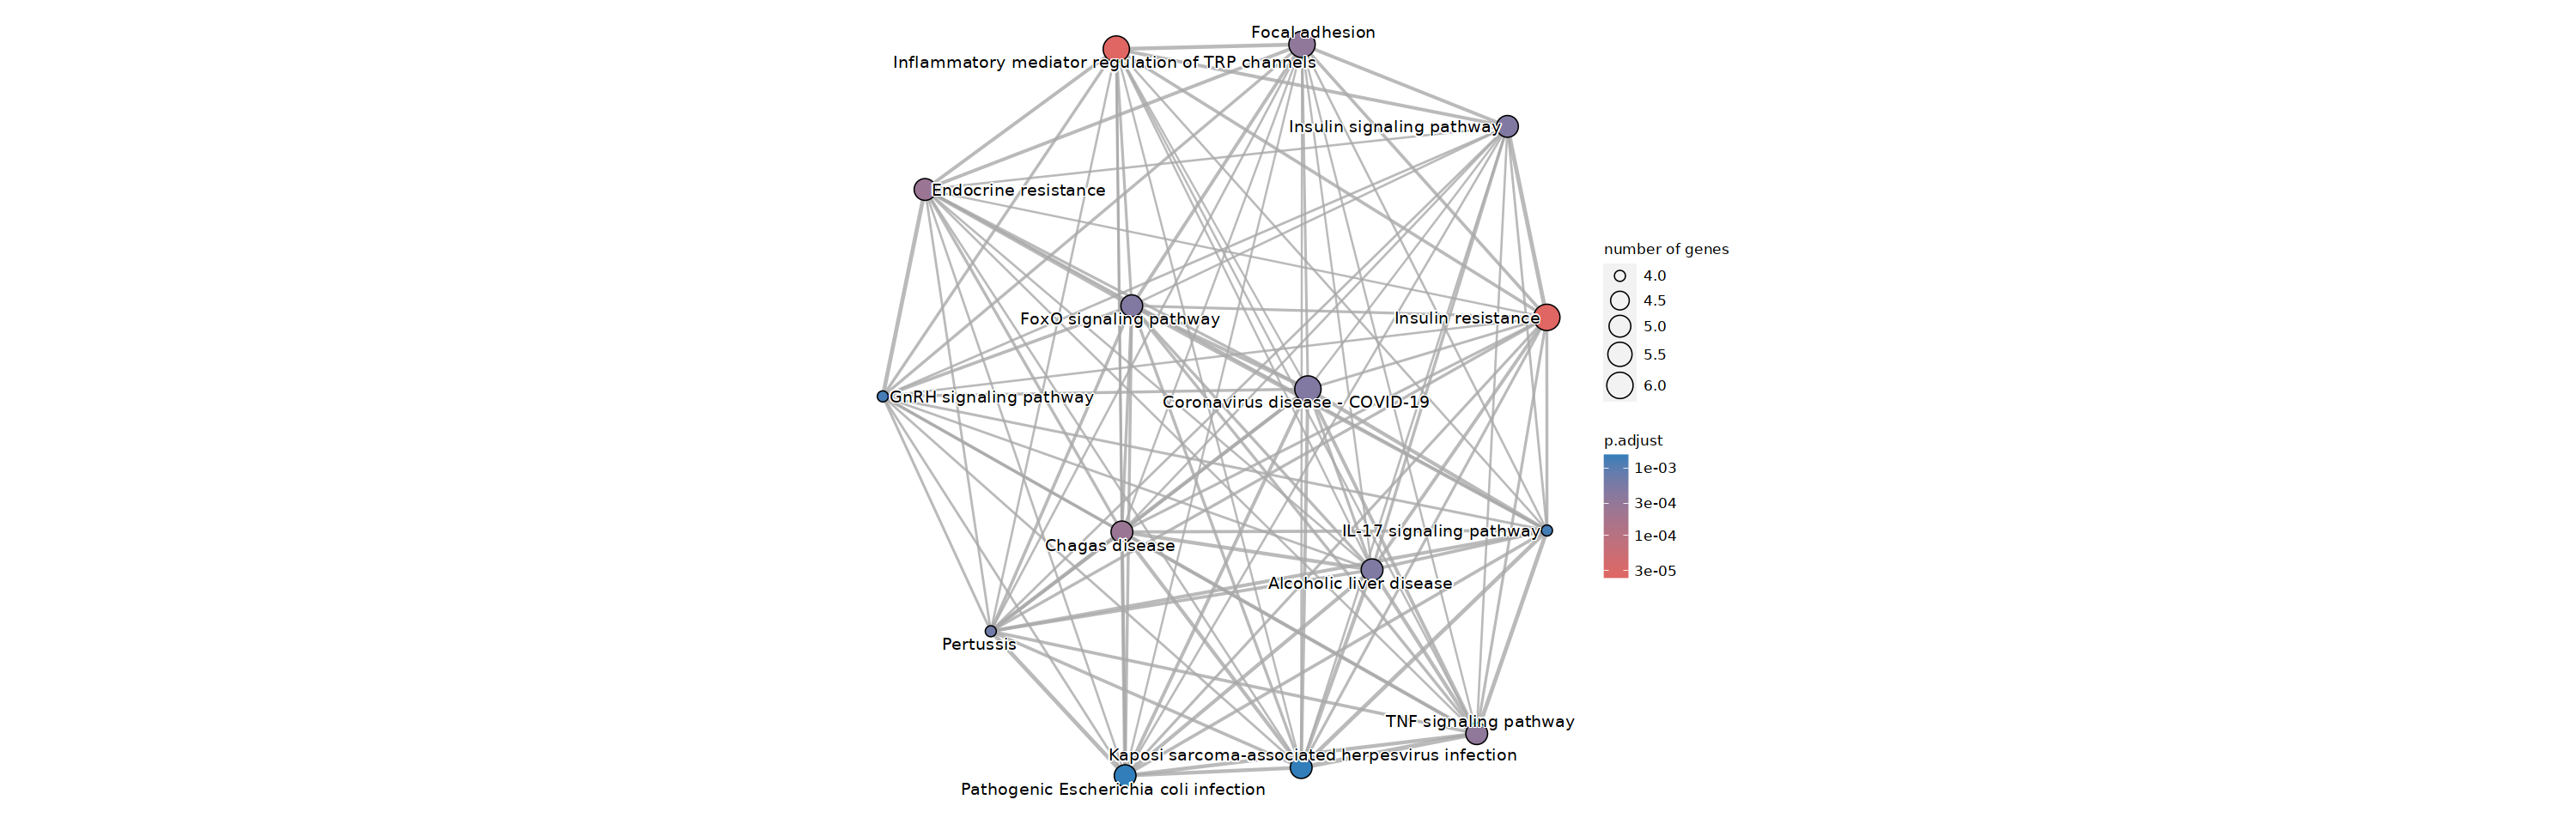

In [474]:
 ek <- enrichKEGG(gene =gene , 
                   organism = "hsa",  
                   pvalueCutoff =1, 
                   qvalueCutoff = 1) 
    keggres = ek@result
    write.csv(keggres,file = 'kegg_results.csv')
    KEGG2 <- pairwise_termsim(ek)
    emapplot(KEGG2, cex_label_category=.8, cex_line=.5,showCategory = 15) + 
      ggplot2::scale_fill_continuous(low = "#e06663", high = "#327eba", name = "p.adjust",
                            guide = ggplot2::guide_colorbar(reverse = TRUE, order=2.5), trans='log10')
    ggsave('KEGG_enrichment_net.pdf',height = 8,width = 8) 

In [478]:
saveRDS(expr1,file = 'expr.rds')

In [479]:
expr1

Symbol,Group,ABCB1,DBP,ADCY1,MAPK9,ID3,CASP1,FAS,UBE3A,...,CSF2,PRKDC,IL6,EGFR,MAPK10,PPARGC1A,NMU,NFIL3,SIAH2,PPP1CB
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM1124358,control,2.006582,2.088067,2.209855,2.125476,2.105605,1.826383,1.871490,2.016419,...,1.893010,1.980718,2.294302,2.070409,2.344453,1.932350,1.722470,2.361215,2.118150,2.122166
GSM1124359,MDD,2.014495,2.141035,2.248393,2.256796,2.113936,1.775478,1.777546,2.046408,...,1.871030,2.013405,1.772629,2.029070,2.383743,1.996535,1.995799,1.941229,2.071485,2.150242
GSM1124360,MDD,1.974940,2.113552,2.218243,2.270442,2.108627,1.768256,1.801689,2.051127,...,1.861140,2.032160,1.761333,2.012310,2.403887,2.013150,1.975217,1.982229,2.079847,2.190608
GSM1124361,MDD,1.939753,2.082876,2.230106,2.259100,2.064477,1.782100,1.800647,2.038447,...,1.885353,2.007222,1.792942,2.065983,2.380567,1.993544,1.826761,1.933711,2.045958,2.149404
GSM1124362,MDD,1.949296,2.163229,2.237276,2.235227,2.081527,1.755510,1.769897,2.045543,...,1.844686,2.041524,1.755896,2.042642,2.408475,2.028545,1.837272,1.905860,2.053430,2.132052
GSM1124363,MDD,2.061589,2.055657,2.174351,2.101932,2.144492,1.772358,1.829239,1.985450,...,1.885822,1.963180,1.936673,2.114453,2.297822,1.918825,1.749202,2.168171,2.020395,2.153775
GSM1124364,MDD,1.997480,2.154550,2.237791,2.145378,2.084916,1.774545,1.793598,2.028729,...,1.859884,1.963617,1.780824,2.077624,2.353922,2.015364,1.759347,1.895072,2.000775,2.124353
GSM1124365,control,2.020538,2.088836,2.246839,2.235349,2.090293,1.756460,1.768088,2.070301,...,1.859640,2.034991,1.759261,2.031724,2.388001,2.047965,1.856600,1.958817,2.029774,2.182368
GSM1124366,MDD,2.099258,2.096436,2.215677,2.166622,2.094196,1.764662,1.801985,2.023230,...,1.876567,1.957205,1.789339,2.058938,2.367283,2.040685,1.825079,1.919010,2.022854,2.170857
